<a href="https://colab.research.google.com/github/UTEDungNguyen/Artificial-Intelligent/blob/main/AI_3_4_2023_Cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

169001437/169001437 [==============================] - 5s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


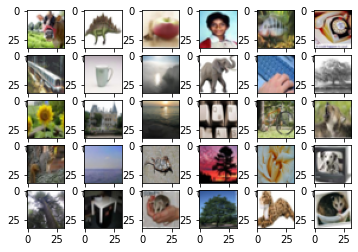

In [ ]:
from keras.datasets import cifar100
import matplotlib.pyplot as plt
import numpy as np
(x_train, y_train),(x_test,y_test) = cifar100.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

for i in range(30):
  plt.subplot(5,6,i+1)
  plt.imshow(x_train[i])
plt.show()

In [ ]:
x_train = x_train.reshape(50000, 32*32*3)
x_train = x_train.astype('float32')/255
print(x_train.shape)

x_test = x_test.reshape(10000, 32*32*3)
x_test = x_test.astype('float32')/255
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [ ]:
from keras.utils import to_categorical #one hot enccoding giatri mau tung diem anh tu thap phan duoi dang 10 bit
y_train = to_categorical (y_train,100)
y_test = to_categorical(y_test,100)

print(y_train.shape) 
print(y_test.shape)

(50000, 100)
(10000, 100)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(1000 , activation = 'relu', input_shape = (32*32*3,)))
model.add(Dense(300 , activation = 'relu'))
model.add(Dense(200 , activation = 'relu'))
model.add(Dense(100 , activation = 'relu'))
# model.add(Dense(100 , activation = 'relu'))
model.add(Dense(100 , activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              3073000   
                                                                 
 dense_1 (Dense)             (None, 300)               300300    
                                                                 
 dense_2 (Dense)             (None, 200)               60200     
                                                                 
 dense_3 (Dense)             (None, 100)               20100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
Total params: 3,463,700
Trainable params: 3,463,700
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=128)
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Độ chính xác trên tập kiểm tra:',test_acc)
print('Hàm mất mát trên tập kiểm tra:',test_loss)

Epoch 1/10
391/391 [==============================] - 30s 75ms/step - loss: 4.3168 - accuracy: 0.0426
Epoch 2/10
391/391 [==============================] - 29s 73ms/step - loss: 3.9468 - accuracy: 0.0939
Epoch 3/10
391/391 [==============================] - 28s 72ms/step - loss: 3.7510 - accuracy: 0.1254
Epoch 4/10
391/391 [==============================] - 29s 74ms/step - loss: 3.6133 - accuracy: 0.1484
Epoch 5/10
391/391 [==============================] - 28s 72ms/step - loss: 3.5127 - accuracy: 0.1684
Epoch 6/10
391/391 [==============================] - 28s 73ms/step - loss: 3.4247 - accuracy: 0.1839
Epoch 7/10
391/391 [==============================] - 28s 72ms/step - loss: 3.3515 - accuracy: 0.1956
Epoch 8/10
391/391 [==============================] - 28s 73ms/step - loss: 3.2826 - accuracy: 0.2086
Epoch 9/10
391/391 [==============================] - 28s 72ms/step - loss: 3.2217 - accuracy: 0.2199
Epoch 10/10
313/313 [==============================] - 4s 10ms/step - loss: 3.4176

In [ ]:
model.save('/content/drive/MyDrive/Model Save/AI_3_4_2023_model.h5')

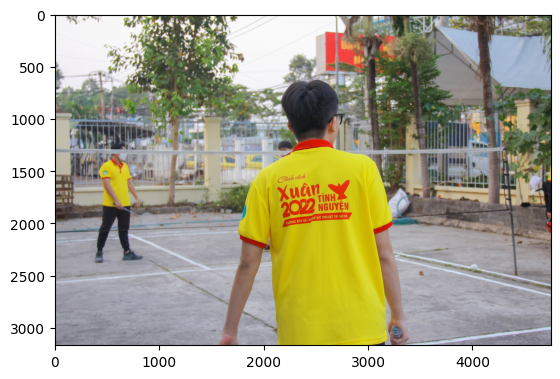

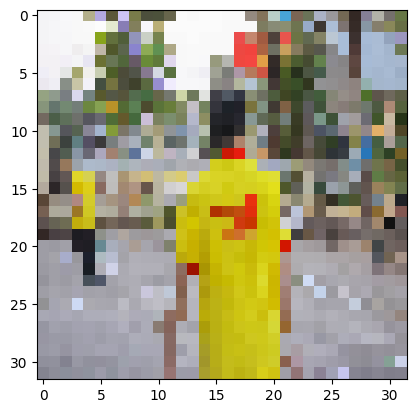

1/1 [==============================] - 0s 221ms/step


array([57])

In [1]:
from keras.models import load_model
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np

model100 = load_model('/content/drive/MyDrive/Model Save/AI_3_4_2023_model.h5')
img = load_img('/content/drive/MyDrive/Xuân Tình Nguyện 2022/IMG_0001.jpg')
plt.imshow(img)
plt.show()

img = load_img('/content/drive/MyDrive/Xuân Tình Nguyện 2022/IMG_0001.jpg', target_size=(32,32))
plt.imshow(img)
plt.show()

img = img_to_array(img)
img = img.reshape(1, 32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model100.predict(img), axis=-1)